In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator, LogLocator

FOR_PRINT = True

if FOR_PRINT:
    LINE_WIDTH = 1
    MARKER_SIZE = 3
    FONT_SIZE = 8

    AXES_WIDTH = 0.65 * LINE_WIDTH

    plt.rcParams['grid.linewidth']=AXES_WIDTH
    plt.rcParams['axes.linewidth']=AXES_WIDTH
    plt.rcParams['axes.labelpad']=3.0

    plt.rcParams['xtick.major.pad']=2.0
    plt.rcParams['xtick.major.size']=2.0
    plt.rcParams['xtick.major.width']=AXES_WIDTH
    plt.rcParams['xtick.minor.size']=1.0
    plt.rcParams['xtick.minor.width']=0.75 * AXES_WIDTH

    plt.rcParams['ytick.major.pad']=-3.0
    plt.rcParams['ytick.major.size']=2.0
    plt.rcParams['ytick.major.width']=AXES_WIDTH
    plt.rcParams['ytick.minor.size']=1.0
    plt.rcParams['ytick.minor.width']=0.75 * AXES_WIDTH
else:
    LINE_WIDTH = 6
    MARKER_SIZE = 14
    FONT_SIZE = 45

%matplotlib inline
#plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['lines.linewidth'] = LINE_WIDTH
plt.rcParams['lines.markeredgewidth'] = 0.75 * LINE_WIDTH
plt.rcParams['lines.markersize'] = MARKER_SIZE
plt.rcParams['font.size'] = FONT_SIZE
rc('text', usetex=True)

In [2]:
data = dict()
with open("quad_reduc_results.json") as results_json_file:
    data = json.load(results_json_file)

In [3]:
original_strength = []
original_rel_error = []
original_np = []

reduced_strength = []
reduced_rel_error = []
reduced_np = []

for result in data:
    o_s = result["original_strength"]
    r_s = result["reduced_strength"]

    if o_s == r_s:
        original_strength.append(o_s)
        original_rel_error.append(result["original_rel_error"])
        original_np.append(result["original_points"])

    reduced_strength.append(r_s)
    reduced_rel_error.append(result["reduced_rel_error"])
    reduced_np.append(result["reduced_points"])

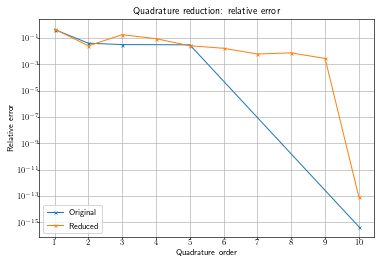

In [4]:
plt.plot(original_strength, original_rel_error, marker='x')
plt.plot(reduced_strength, reduced_rel_error, marker='x')
plt.legend(['Original', 'Reduced'], loc='lower left')
plt.semilogy()
plt.xlabel("Quadrature order")
plt.ylabel("Relative error")
plt.axes().xaxis.set_major_locator(MultipleLocator(1))
plt.title("Quadrature reduction: relative error")
plt.grid()
plt.show()

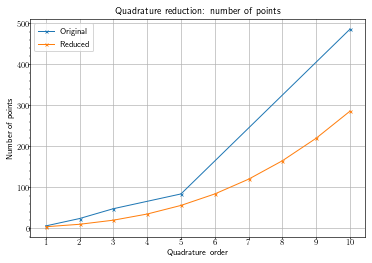

In [5]:
plt.plot(original_strength, original_np, marker='x')
plt.plot(reduced_strength, reduced_np, marker='x')
plt.legend(['Original', 'Reduced'], loc='upper left')
#plt.semilogy()
plt.xlabel("Quadrature order")
plt.ylabel("Number of points")
plt.axes().yaxis.set_minor_locator(MultipleLocator(20))
plt.axes().xaxis.set_major_locator(MultipleLocator(1))
plt.title("Quadrature reduction: number of points")
plt.grid()
plt.show()

In [6]:
monomial_data = dict()
with open("quad_reduc_results_monomials.json") as results_json_file:
    monomial_data = json.load(results_json_file)

In [7]:
original_errors = []
original_strengths = []

original_intermediate_errors = []
original_intermediate_strengths = []

reduced_errors = []
reduced_strengths = []

for strength_set in monomial_data:
    strength = strength_set["strength"]
    monomial_results = strength_set["results"]

    original_errors_s = []
    original_intermediate_errors_s = []
    reduced_errors_s = []
    for r in map(lambda r : r["result"], monomial_results):
        reduced_errors_s.append(r["reduced_rel_error"])
        if r["original_strength"] == r["reduced_strength"]:
            original_errors_s.append(r["original_rel_error"])
        else:
            original_intermediate_errors_s.append(r["original_rel_error"])

    original_strengths_s = [strength + 0.1 for _ in range(len(original_errors_s))]
    original_intermediate_strengths_s = [strength + 0.1 for _ in range(len(original_intermediate_errors_s))]
    reduced_strengths_s = [strength - 0.1 for _ in range(len(reduced_errors_s))]

    original_errors.append(original_errors_s)
    original_strengths.append(original_strengths_s)

    original_intermediate_errors.append(original_intermediate_errors_s)
    original_intermediate_strengths.append(original_intermediate_strengths_s)

    reduced_errors.append(reduced_errors_s)
    reduced_strengths.append(reduced_strengths_s)

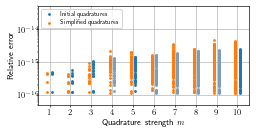

In [12]:
FIG_WIDTH = 3.6 if FOR_PRINT else 20
FIG_HEIGHT = 1.9 if FOR_PRINT else 10

fig = plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))

SCATTER_MARKER_SIZE = 0.35 * MARKER_SIZE ** 2 if FOR_PRINT else 160

for (errs, s) in zip(reduced_errors, reduced_strengths):
    errs = np.array(errs)
    errs[errs < 1e-16] = np.NaN
    scatter_reduced = plt.scatter(s, errs, s=SCATTER_MARKER_SIZE, color="#ff7d0e", zorder=100)
for (errs, s) in zip(original_intermediate_errors, original_intermediate_strengths):
    errs = np.array(errs)
    errs[errs < 1e-16] = np.NaN
    scatter_original = plt.scatter(s, errs, s=SCATTER_MARKER_SIZE, color="#7f9eb5", zorder=100)
for (errs, s) in zip(original_errors, original_strengths):
    errs = np.array(errs)
    errs[errs < 1e-16] = np.NaN
    scatter_original = plt.scatter(s, errs, s=SCATTER_MARKER_SIZE, color="#1f77b4", zorder=100)

plt.legend([scatter_original, scatter_reduced], ['Initial quadratures', 'Simplified quadratures'], prop={'size': 0.75 * FONT_SIZE}, loc='upper left')
plt.semilogy()
plt.ylim(5e-17, 5e-14)
plt.xlabel("Quadrature strength $m$")
plt.ylabel("Relative error")
plt.axes().xaxis.set_major_locator(MultipleLocator(1))
#plt.axes().yaxis.set_major_locator(LogLocator(10, subs=(1.0, 0.2)))
#plt.title("Monomial integration accuracy", fontsize=45)
plt.grid(zorder=-100)

plt.tight_layout()
#plt.savefig("monomial_accuracy.pdf", format='pdf', bbox_inches='tight')
plt.savefig("monomial_accuracy.pgf", format='pgf', bbox_inches='tight')
plt.show()